## In this notebook we study the following single species coagulation and branching reaction with sopantaneous creation and destruction:

\begin{equation}
    A \leftrightharpoons_{k_2}^{k_1} \emptyset    
\end{equation}

\begin{equation}
    A + A \leftrightharpoons_{k_{31}}^{k_{32}} A    
\end{equation}

## Starting from Poisson initial conditions. 

### From the following paper: 
##### M. Harsh and P. Sollich, Accurate Dynamics from Self-Consistent Memory in Stochastic Chemical Reactions with Small Copy Numbers, J. Phys. A: Math. Theor. (2023).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

sys.path.append('../')
sys.path.append('../src')

from src import cheMASTER
from src.sbr import AAA,ABC,AAA_back

import matplotlib

#from importlib import reload
#reload(AAA)

## Setting up the reaction stoichiometry, rates and initial conditions

In [2]:
# Setting up the reactions and the parameters:

num_species     = 1 #Number of species in the reaction system
num_interaction = 2 # Number of interating reactions in the Hamiltonian
num_reactions   = 2*num_species + num_interaction # This counts the total number of possible reactions in the system.
                                        # We have 2N creation and destruction reactions and the rest interaction reactions
# k1,A = 8, k2,A = 3, k1,B =8, k2,B =2, k1,C =3, k2,C =1.5 and k3 =0.5.

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([1.]) #len must be equal to num_species
k2 = np.array([1.]) #len must be equal to num_species

# Interaction reactions:
k3 = np.array([1.,1.])         #len must be equal to num_interactions    
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])
rxn_par = [k1,k2,k3]

#Write this for all reactions in the interacting Hamiltonian corresponding to the reaction rate k3
s_i[0] = [1] 
r_i[0] = [2]

s_i[1] = [2]
r_i[1] = [1]

#The initial concentration of the species. 
#Note: for Gillespie we start each trajectory from a Poisonian random variable with mean as the initial conc.below:
initial_values = 4./3.


In [3]:
plt.rcParams.update({'text.usetex':False,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'xtick.major.width':3,
                     'ytick.major.width':3,
                     'xtick.major.size':10,
                     'ytick.major.size':10,
                     'xtick.direction':'in',
                     'ytick.direction':'in',

'font.size': 30,
'figure.autolayout': True,
'figure.figsize': (10,5),
'axes.titlesize' : 20,
'axes.labelsize' : 20,
'lines.linewidth' : 3,
'lines.markersize' : 3,
'legend.fontsize': 13,
'mathtext.fontset': 'stix',
'axes.linewidth':3,
'font.family': 'Arial'})

### Master Equation via Euler steps:

In [4]:
sys_1 = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sys_1,initial_values,0,4.,0.004)
cheMASTER.runDynamics(sys_1,max_num=[20],method='Euler')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11008.47it/s]


### ME with Eigenvalues:

In [6]:
sysEV_1 = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sysEV_1,initial_values,0,4.,0.004)
cheMASTER.runDynamics(sysEV_1,max_num=[20],method='Eigenvalue')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10737.58it/s]


### The various diagrammatic approximations:

In [8]:
y_all,resp_all,time_grid_all = \
AAA_back.integrate_all_corr(k1,k2,k3,alpha=1.,init_time=0.,final_time=4.,dt=0.004,initial_values=initial_values)

In [9]:
y_mak,resp_mak,time_grid_mak = \
AAA_back.integrate_mak(k1,k2,k3,alpha=1.,init_time=0.,final_time=4.,dt=0.004,initial_values=initial_values)

In [10]:
y_all_R0,resp_all_R0,time_grid_all_R0 = \
AAA_back.integrate_all_alpha_0(k1,k2,k3,alpha=1.,init_time=0.,final_time=4.,dt=0.004,initial_values=initial_values)

In [11]:
y_R0_2,resp_R0_2,time_grid_R0_2 = \
AAA_back.integrate_alpha2_alpha_0(k1,k2,k3,alpha=1.,init_time=0.,final_time=4.,dt=0.004,initial_values=initial_values)

In [12]:
y_R_2,resp_R_2,time_grid_R_2 = \
AAA_back.integrate_alpha2_alpha_all(k1,k2,k3,alpha=1.,init_time=0.,final_time=4.,dt=0.004,initial_values=initial_values)

In [16]:
y_emre,time_grid_emre,eps_emre,var_emre = \
AAA_back.emre(k1,k2,k3,alpha=1.,init_time=0.,final_time=4.,dt=0.004,initial_values=initial_values)

#### Moment closure:

In [14]:
momentClosure_alpha1 = np.loadtxt("../data/momentClosure/AA_A_back/alpha_1.csv")

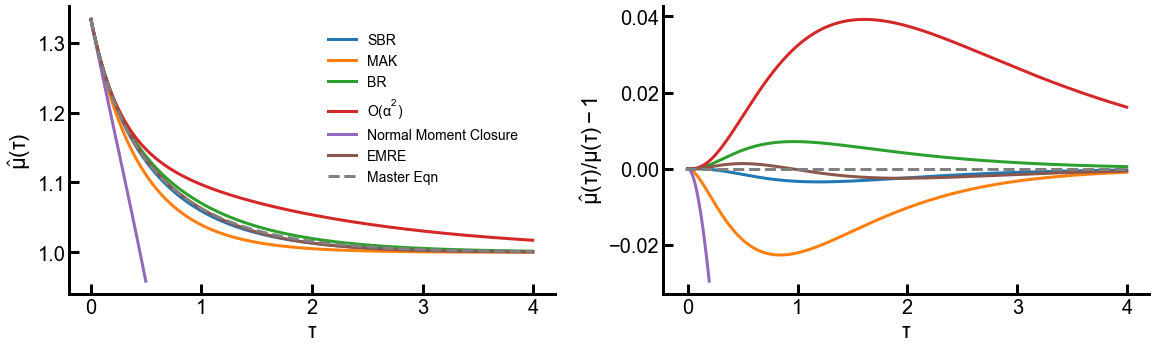

In [17]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_axes([0, 0, 0.45, 1])

ax1.plot(time_grid_all,y_all,label = 'SBR')
ax1.plot(time_grid_mak,y_mak, label = 'MAK')
ax1.plot(time_grid_mak,y_all_R0,label = 'BR')
ax1.plot(time_grid_mak,y_R0_2, label = r'$\mathregular{O(\alpha^2)}$' )
#ax1.plot(time_grid_mak,y_R_2,label = r'$\mathregular{O(\alpha^2)}$ with dressed resp')
ax1.plot(momentClosure_alpha1[0,:125],momentClosure_alpha1[1,:125],label= 'Normal Moment Closure')
ax1.plot(time_grid_emre[0:],(y_emre+eps_emre)[0:],label = 'EMRE')
ax1.plot(sys_1.timeGrid,sys_1.y[0],'--',label = 'Master Eqn',color='gray')

ax1.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
ax1.set_ylabel(r'$\mathregular{\hat{\mu}(\tau)}$',fontsize=22)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
ax1.legend(bbox_to_anchor=(0.95, 0.95), loc=1, frameon=False, fontsize=14)
#ax1.legend(loc=0, frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_axes([0.55, 0., 0.45, 1])

ax2.plot(time_grid_all,y_all/sys_1.y[0]-1,     label = '_Bubble resummation w/ dressed resp')
ax2.plot(time_grid_mak,y_mak/sys_1.y[0]-1,     label = '_Mass action kinetics')
ax2.plot(time_grid_mak,y_all_R0/sys_1.y[0]-1,  label = '_Bubble resummation w/ bare resp')
ax2.plot(time_grid_mak,y_R0_2/sys_1.y[0]-1,    label = r'$\mathregular{O(\alpha^2)}$ w/ bare resp')
#ax1.plot(time_grid_mak,y_R_2/sys_1.y[0]-1 ,label = r'$\mathregular{O(\alpha^2)}$ w/ dressed resp')
ax2.plot(momentClosure_alpha1[0,:50],momentClosure_alpha1[1,:50]/sys_1.y[0,:50]-1,label= 'Normal Moment Closure')
ax2.plot(time_grid_emre[0:],(y_emre+eps_emre)/sys_1.y[0]-1,label = 'EMRE')
ax2.hlines(0,-0.025,time_grid_mak[-1],linestyles='dashed',colors='gray',label = 'Master Eqn soln')

ax2.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
ax2.set_ylabel(r'$\mathregular{\hat{\mu}(\tau)/\mu(\tau) - 1}$',fontsize=22)
ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.02))
#ax2.legend(bbox_to_anchor=(0.52, 1.), loc=1, frameon=False, fontsize=14)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



### Change the rates:

In [41]:
alpha_range = [0.1,1.,10.,100.,1000.]
dt_range    = np.multiply(1,[0.02,0.002,0.0002,0.00002,0.000002])
ftime_range = np.multiply(2,[20.,2.,0.2,0.02,0.002])

In [45]:
Y_ALL_ALPHA_0,RESP_ALL_ALPHA_0,TG_ALL_ALPHA_0 = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA_back.integrate_all_alpha_0(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALL_ALPHA_0.append(y)
    RESP_ALL_ALPHA_0.append(resp)
    TG_ALL_ALPHA_0.append(time_grid)
    print(i)

0
1
2
3
4


In [42]:
Y_ALPHA2_ALPHA_0,RESP_ALPHA2_ALPHA_0,TG_ALPHA2_ALPHA_0 = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA_back.integrate_alpha2_alpha_0(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALPHA2_ALPHA_0.append(y)
    RESP_ALPHA2_ALPHA_0.append(resp)
    TG_ALPHA2_ALPHA_0.append(time_grid)

In [46]:
Y_ALPHA2_ALL,RESP_ALPHA2_ALL,TG_ALPHA2_ALL = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA_back.integrate_alpha2_alpha_all(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALPHA2_ALL.append(y)
    RESP_ALPHA2_ALL.append(resp)
    TG_ALPHA2_ALL.append(time_grid)
    print(i)

0
1
2
3
4


In [43]:
Y_EMRE,VAR_EMRE,TG_EMRE,EPS_EMRE = [],[],[],[]

for i in range(len(alpha_range)):
    #y_emre,time_grid_emre,eps_emre,var_emre = emre(alpha=1.,init_time=0.,final_time=2.,dt=0.02,initial_values=initial_values)
    y,time_grid,eps,var = AAA_back.emre(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_EMRE.append(y+eps)
    VAR_EMRE.append(var)
    TG_EMRE.append(time_grid)



In [44]:
Y_MAK,RESP_MAK,TG_MAK = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA_back.integrate_mak(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_MAK.append(y)
    RESP_MAK.append(resp)
    TG_MAK.append(time_grid)



In [47]:
Y_ALL,RESP_ALL,TG_ALL = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA_back.integrate_all_corr(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALL.append(y)
    RESP_ALL.append(resp)
    TG_ALL.append(time_grid)
    print(i)

0
1
2
3
4


In [49]:
SYSEV1 = []
for i in range(len(alpha_range)):
    rxn_par[2] = k3*alpha_range[i]
    SYSEV1.append(cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(SYSEV1[i],initial_values,0,ftime_range[i],dt_range[i])
    cheMASTER.runDynamics(SYSEV1[i],max_num=[20],method='Eigenvalue')
rxn_par[2] = k3

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:00<00:00, 15712.77it/s]


In [48]:
SYS1 = []
for i in range(len(alpha_range)):
    rxn_par[2] = k3*alpha_range[i]
    SYS1.append(cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(SYS1[i],initial_values,0,ftime_range[i],dt_range[i])
    cheMASTER.runDynamics(SYS1[i],max_num=[20],method='Euler')
rxn_par[2] = k3

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:00<00:00, 17871.17it/s]


In [37]:
SYS2 = []
for i in range(len(alpha_range)):
    rxn_par[2] = k3*alpha_range[i]
    SYS2.append(cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(SYS2[i],initial_values,0,ftime_range[i],dt_range[i])
    cheMASTER.runDynamics(SYS2[i],max_num=[20],method='Euler')
rxn_par[2] = k3

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:00<00:00, 21003.95it/s]


In [30]:
MomentClosure = []
for i in range(len(alpha_range)):
        MomentClosure.append(np.loadtxt("../data/momentClosure/AA_A_back_paper/alpha_"+str(i+1)+".csv"))

In [60]:
## The stored moment closure seems to have an issue because it diverges -- need to regenerate the data!

In [56]:
## Make the sum of relative deviation along the trajectory
Y_ALL_rel          = np.zeros(len(alpha_range))
Y_ALL_ALPHA_0_rel  = np.zeros(len(alpha_range))
Y_MAK_rel          = np.zeros(len(alpha_range))
Y_ALPHA2_ALPHA_0_rel   = np.zeros(len(alpha_range))
Y_ALPHA2_ALL_rel       = np.zeros(len(alpha_range))
momentClosure_rel      = np.zeros(len(alpha_range))
Y_EMRE_rel          = np.zeros(len(alpha_range))

for i in range(len(alpha_range)):
    momentClosure_rel[i]  = np.mean(np.abs((MomentClosure[i][1,1:]-SYS2[i].y[0,:len(MomentClosure[i][1])-1])/SYS2[i].y[0,:len(MomentClosure[i][1])-1]),axis=0,keepdims=False)
    Y_ALL_rel[i]          = np.mean(np.abs((Y_ALL[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)
    Y_ALL_ALPHA_0_rel[i]  = np.mean(np.abs((Y_ALL_ALPHA_0[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)                          
    Y_MAK_rel[i]          = np.mean(np.abs((Y_MAK[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)
    Y_ALPHA2_ALL_rel[i]   = np.mean(np.abs((Y_ALPHA2_ALL[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)                          
    Y_ALPHA2_ALPHA_0_rel[i]  = np.mean(np.abs((Y_ALPHA2_ALPHA_0[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)                          
    Y_EMRE_rel[i]          = np.mean(np.abs((Y_EMRE[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)

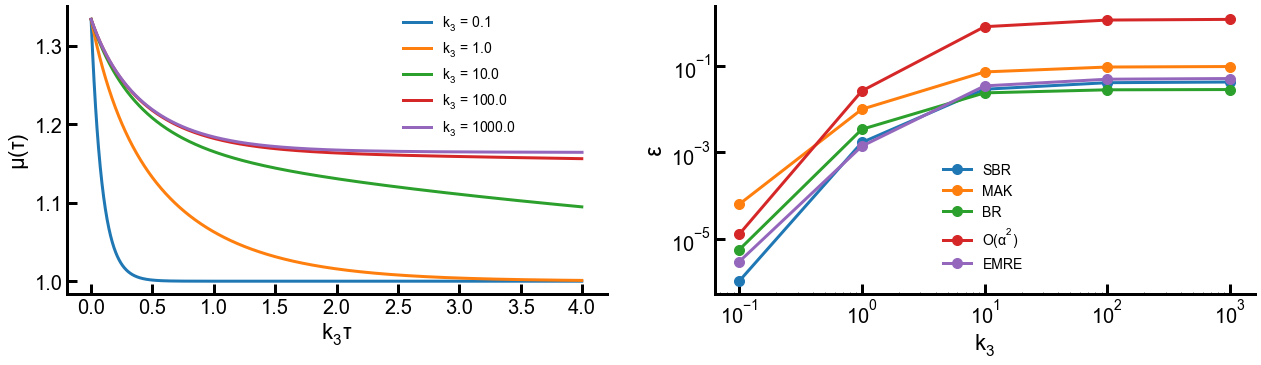

In [58]:
fig = plt.figure(figsize=(15,4))

ax1= fig.add_axes([0.,0, 0.5, 1])

for i in range(len(alpha_range)):
    ax1.plot(alpha_range[i]*SYSEV1[i].timeGrid,SYSEV1[i].y[0],label=r'$\mathregular{k_3}$ = ' + str(alpha_range[i]))
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_xlabel(r'$\mathregular{k_3 \tau}$',fontsize=22)
ax1.set_ylabel(r'$\mathregular{\mu(\tau)}$',fontsize=22)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))

ax1.legend(bbox_to_anchor=(0.6, 0.5), loc=0, frameon=False, fontsize=14)


ax2= fig.add_axes([0.60,0, 0.5, 1])
ax2.plot(alpha_range,Y_ALL_rel,'o-' ,    label = 'SBR',markersize=10)
ax2.plot(alpha_range,Y_MAK_rel,'o-',          label = 'MAK',markersize=10)
ax2.plot(alpha_range,Y_ALL_ALPHA_0_rel,'o-',  label = 'BR',markersize=10)
ax2.plot(alpha_range,Y_ALPHA2_ALPHA_0_rel,'o-',  label = r'$\mathregular{O(\alpha^2)}$',markersize=10)
#ax2.plot(alpha_range,Y_ALPHA2_ALL_rel ,'o-',     label = r'$\mathregular{O(\alpha^2)}$ w/ dressed resp',markersize=10)
#ax2.plot(alpha_range,momentClosure_rel,'o-',     label= 'Normal Moment Closure',markersize=10)
ax2.plot(alpha_range,Y_EMRE_rel,'o-',     label= 'EMRE',markersize=10)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlabel(r'$\mathregular{k_3}$',fontsize=22)
ax2.set_ylabel(r'$\mathregular{\epsilon}$',fontsize=24)

ax2.legend(bbox_to_anchor=(0.4, 0.5), loc=0, frameon=False, fontsize=14)